In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

#Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [ ]:
train_set=train.flow_from_directory('/content/drive/My Drive/Half-HandGesture/D_cnn/train/',
                                        target_size=(224,224),
                                        class_mode='sparse')
val_set=validation.flow_from_directory('/content/drive/My Drive/Half-HandGesture/D_cnn/val/',
                                        target_size=(224,224),
                                        class_mode='sparse')

test_set=test.flow_from_directory('/content/drive/My Drive/Half-HandGesture/D_cnn/test/',
                                        target_size=(224,224),
                                        class_mode='sparse',
                                        shuffle=False)

Found 2100 images belonging to 6 classes.
Found 450 images belonging to 6 classes.
Found 450 images belonging to 6 classes.


In [ ]:
train_set.class_indices

{'ai': 0, 'hand0': 1, 'hand1': 2, 'hand13': 3, 'hand5': 4, 'hand8': 5}

In [ ]:
val_set.class_indices

{'ai': 0, 'hand0': 1, 'hand1': 2, 'hand13': 3, 'hand5': 4, 'hand8': 5}

In [ ]:
train_set.classes

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

In [ ]:
x_batch, y_batch = next(test_set)

In [ ]:
len(y_batch)

32

#Transfer learning- Xception

In [ ]:
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(6, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=val_set, epochs=3)

Epoch 1/3
66/66 [==============================] - 27s 313ms/step - loss: 0.5621 - accuracy: 0.8033 - val_loss: 0.1272 - val_accuracy: 0.9489
Epoch 2/3
66/66 [==============================] - 18s 267ms/step - loss: 0.1841 - accuracy: 0.9352 - val_loss: 0.1499 - val_accuracy: 0.9556
Epoch 3/3
66/66 [==============================] - 18s 273ms/step - loss: 0.0708 - accuracy: 0.9738 - val_loss: 0.1047 - val_accuracy: 0.9644


In [ ]:
for layer in base_model.layers[56:]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
#metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
history = model.fit(train_set, validation_data=val_set, epochs=5)

Epoch 1/5
66/66 [==============================] - 35s 386ms/step - loss: 0.1190 - accuracy: 0.9614 - val_loss: 0.0279 - val_accuracy: 0.9867
Epoch 2/5
66/66 [==============================] - 24s 366ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0040 - val_accuracy: 0.9978
Epoch 3/5
66/66 [==============================] - 24s 368ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4/5
66/66 [==============================] - 23s 340ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 6.0923e-04 - val_accuracy: 1.0000
Epoch 5/5
66/66 [==============================] - 24s 359ms/step - loss: 7.0588e-04 - accuracy: 1.0000 - val_loss: 7.3025e-04 - val_accuracy: 1.0000


In [ ]:
results= model.evaluate(test_set)

15/15 [==============================] - 4s 203ms/step - loss: 4.3899e-04 - accuracy: 1.0000


In [ ]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.00043898739386349916, 1.0]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = model.predict(test_set)

15/15 [==============================] - 4s 198ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_set.classes

In [ ]:
y_pred_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,

In [ ]:
class_labels = list(test_set.class_indices.keys())

In [ ]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
cm

array([[75,  0,  0,  0,  0,  0],
       [ 0, 75,  0,  0,  0,  0],
       [ 0,  0, 75,  0,  0,  0],
       [ 0,  0,  0, 75,  0,  0],
       [ 0,  0,  0,  0, 75,  0],
       [ 0,  0,  0,  0,  0, 75]])

In [ ]:
print('Classification Report')
report=classification_report(y_true_classes, y_pred_classes, target_names=class_labels)
print(report)

Classification Report
              precision    recall  f1-score   support

          ai       1.00      1.00      1.00        75
       hand0       1.00      1.00      1.00        75
       hand1       1.00      1.00      1.00        75
      hand13       1.00      1.00      1.00        75
       hand5       1.00      1.00      1.00        75
       hand8       1.00      1.00      1.00        75

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



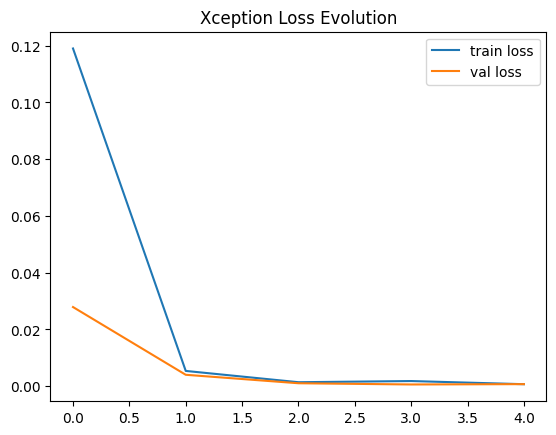

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Xception Loss Evolution')
plt.legend()
plt.show()

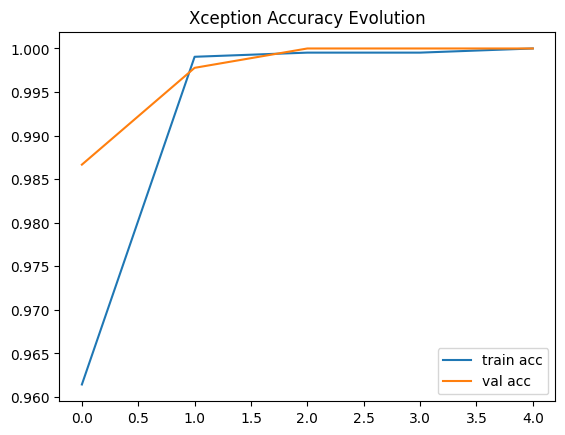

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Xception Accuracy Evolution')
plt.legend()
plt.show()

#Transfer Learning- VGG16

In [ ]:
base_model = tf.keras.applications.VGG16(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(6, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=val_set, epochs=3)

Epoch 1/3
66/66 [==============================] - 27s 330ms/step - loss: 3.5662 - accuracy: 0.3257 - val_loss: 2.4574 - val_accuracy: 0.5067
Epoch 2/3
66/66 [==============================] - 18s 265ms/step - loss: 1.5972 - accuracy: 0.6052 - val_loss: 0.6619 - val_accuracy: 0.7222
Epoch 3/3
66/66 [==============================] - 23s 348ms/step - loss: 0.4966 - accuracy: 0.8129 - val_loss: 0.9556 - val_accuracy: 0.6622


In [ ]:
for layer in base_model.layers[56:]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
#metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
history = model.fit(train_set, validation_data=val_set, epochs=5)

Epoch 1/5
66/66 [==============================] - 23s 338ms/step - loss: 0.2805 - accuracy: 0.9100 - val_loss: 0.2635 - val_accuracy: 0.9356
Epoch 2/5
66/66 [==============================] - 22s 335ms/step - loss: 0.2190 - accuracy: 0.9486 - val_loss: 0.2457 - val_accuracy: 0.9422
Epoch 3/5
66/66 [==============================] - 21s 320ms/step - loss: 0.2099 - accuracy: 0.9533 - val_loss: 0.2476 - val_accuracy: 0.9289
Epoch 4/5
66/66 [==============================] - 30s 459ms/step - loss: 0.2051 - accuracy: 0.9567 - val_loss: 0.2295 - val_accuracy: 0.9489
Epoch 5/5
66/66 [==============================] - 22s 330ms/step - loss: 0.2068 - accuracy: 0.9529 - val_loss: 0.2366 - val_accuracy: 0.9311


In [ ]:
results= model.evaluate(test_set)

15/15 [==============================] - 3s 172ms/step - loss: 0.2297 - accuracy: 0.9378


In [ ]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.2296888381242752, 0.9377777576446533]


In [ ]:
y_pred = model.predict(test_set)

15/15 [==============================] - 3s 177ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_set.classes

In [ ]:
class_labels = list(test_set.class_indices.keys())

In [ ]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
cm

array([[70,  0,  0,  0,  2,  3],
       [ 0, 74,  1,  0,  0,  0],
       [ 0,  8, 58,  1,  0,  8],
       [ 1,  0,  0, 73,  0,  1],
       [ 1,  0,  0,  0, 74,  0],
       [ 1,  0,  0,  0,  1, 73]])

In [ ]:
print('Classification Report')
report=classification_report(y_true_classes, y_pred_classes, target_names=class_labels)
print(report)

Classification Report
              precision    recall  f1-score   support

          ai       0.96      0.93      0.95        75
       hand0       0.90      0.99      0.94        75
       hand1       0.98      0.77      0.87        75
      hand13       0.99      0.97      0.98        75
       hand5       0.96      0.99      0.97        75
       hand8       0.86      0.97      0.91        75

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



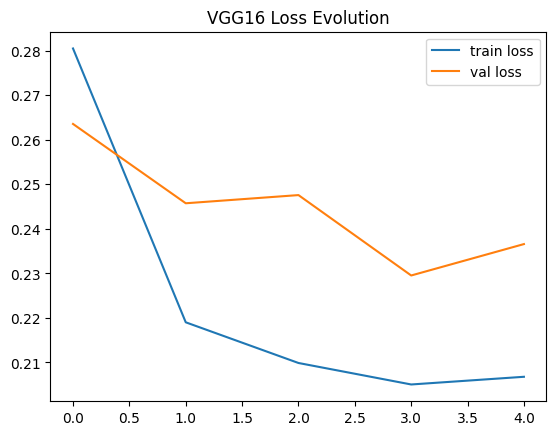

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("VGG16 Loss Evolution")
plt.legend()
plt.show()

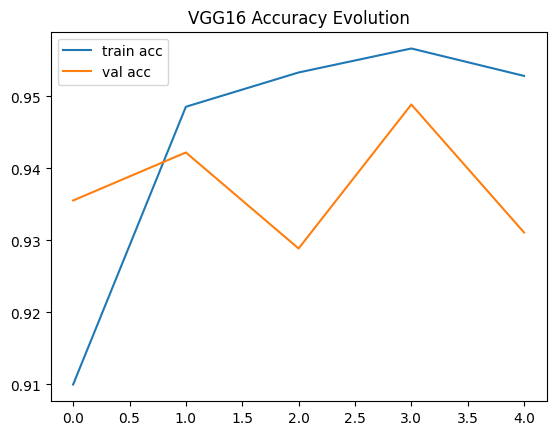

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("VGG16 Accuracy Evolution")
plt.legend()
plt.show()

# Customized CNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3),padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
history = model.fit(train_set, validation_data=val_set, epochs=10)

Epoch 1/10
66/66 [==============================] - 22s 272ms/step - loss: 1.8167 - accuracy: 0.1810 - val_loss: 1.6941 - val_accuracy: 0.3222
Epoch 2/10
66/66 [==============================] - 17s 250ms/step - loss: 1.6608 - accuracy: 0.2771 - val_loss: 1.5108 - val_accuracy: 0.3311
Epoch 3/10
66/66 [==============================] - 17s 263ms/step - loss: 1.5335 - accuracy: 0.3481 - val_loss: 1.3923 - val_accuracy: 0.4244
Epoch 4/10
66/66 [==============================] - 19s 290ms/step - loss: 1.3282 - accuracy: 0.4614 - val_loss: 1.2872 - val_accuracy: 0.4556
Epoch 5/10
66/66 [==============================] - 17s 259ms/step - loss: 1.0446 - accuracy: 0.5957 - val_loss: 1.0441 - val_accuracy: 0.6111
Epoch 6/10
66/66 [==============================] - 19s 293ms/step - loss: 0.7798 - accuracy: 0.7038 - val_loss: 0.9014 - val_accuracy: 0.6844
Epoch 7/10
66/66 [==============================] - 17s 259ms/step - loss: 0.6370 - accuracy: 0.7652 - val_loss: 0.7271 - val_accuracy: 0.7378

In [ ]:
results= model.evaluate(test_set)

15/15 [==============================] - 3s 187ms/step - loss: 0.6915 - accuracy: 0.7644


In [ ]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.6914709210395813, 0.7644444704055786]


In [ ]:
y_pred = model.predict(test_set)

15/15 [==============================] - 3s 188ms/step


In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())
cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

[[69  0  0  4  1  1]
 [ 0 42 26  3  0  4]
 [ 0 11 58  2  1  3]
 [ 0  3  5 56  8  3]
 [ 0  0  1  8 63  3]
 [ 0  2  8  3  6 56]]


In [ ]:
print('Classification Report')
report=classification_report(y_true_classes, y_pred_classes, target_names=class_labels)
print(report)

Classification Report
              precision    recall  f1-score   support

          ai       1.00      0.92      0.96        75
       hand0       0.72      0.56      0.63        75
       hand1       0.59      0.77      0.67        75
      hand13       0.74      0.75      0.74        75
       hand5       0.80      0.84      0.82        75
       hand8       0.80      0.75      0.77        75

    accuracy                           0.76       450
   macro avg       0.78      0.76      0.77       450
weighted avg       0.78      0.76      0.77       450



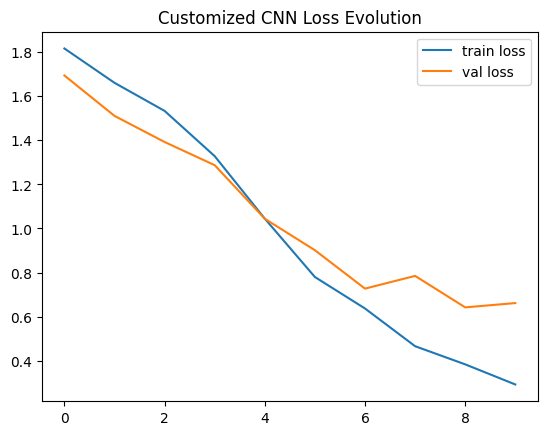

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Customized CNN Loss Evolution")
plt.legend()
plt.show()

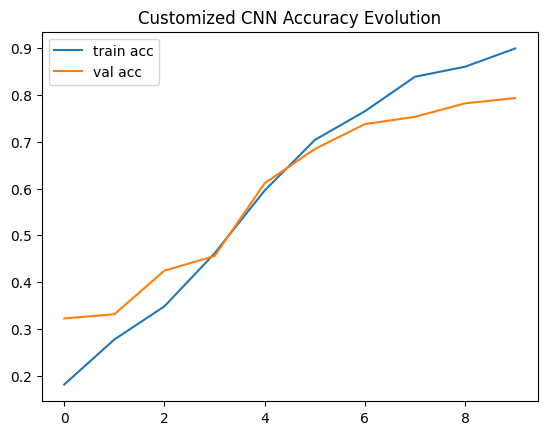

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Customized CNN Accuracy Evolution")
plt.legend()
plt.show()